In [1]:
import cv2
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
zip_file = zipfile.ZipFile(file = "/content/drive/MyDrive/Deep_Learning/Face_Recognation/Material.zip",mode = "r")
zip_file.extractall("./")
zip_file.close()

zip_file = zipfile.ZipFile(file = "/content/Material/fer2013.zip",mode = "r")
zip_file.extractall("./")
zip_file.close()

In [3]:
classes = ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'] 

total = []
emotions = []
name_img = []
name_emotion = []

max_photo = 3000

for i,classe in enumerate(classes):
    imgs_training = glob.glob("/content/fer2013/train/"+classe+"/*")
    a = 0
    
    for img in imgs_training:
        total.append(img)
        name_img.append(str(img.split("/")[-1]))
        emotions.append(i)
        name_emotion.append(classe)
        a = a+1
        #if a >=max_photo:
        #    break
    
    print("Number of Images "+ classe + " = "+str(len(imgs_training)))

dataset = pd.DataFrame()
dataset["img"] = name_img
dataset["emotion"] = emotions
dataset["class"] = name_emotion

Number of Images Angry = 3995
Number of Images Disgust = 436
Number of Images Fear = 4097
Number of Images Happy = 7215
Number of Images Sad = 4830
Number of Images Surprise = 3171
Number of Images Neutral = 4965


In [4]:
print("Shape : ", dataset.shape) # 28709
dataset.tail()

Shape :  (28709, 3)


,img,emotion,class
28704,2032.jpg,6,Neutral
28705,1017.jpg,6,Neutral
28706,371.jpg,6,Neutral
28707,1018.jpg,6,Neutral
28708,4012.jpg,6,Neutral


In [5]:
# Example
total[0]

'/content/fer2013/train/Angry/1143.jpg'

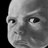

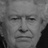

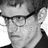

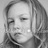

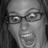

200 photo upload [+0.1s]
400 photo upload [+0.02s]
600 photo upload [+0.02s]
800 photo upload [+0.02s]
1000 photo upload [+0.02s]
1200 photo upload [+0.02s]
1400 photo upload [+0.02s]
1600 photo upload [+0.02s]
1800 photo upload [+0.02s]
2000 photo upload [+0.02s]
2200 photo upload [+0.02s]
2400 photo upload [+0.03s]
2600 photo upload [+0.02s]
2800 photo upload [+0.02s]
3000 photo upload [+0.02s]
3200 photo upload [+0.02s]
3400 photo upload [+0.02s]
3600 photo upload [+0.02s]
3800 photo upload [+0.02s]
4000 photo upload [+0.02s]
4200 photo upload [+0.02s]
4400 photo upload [+0.02s]
4600 photo upload [+0.02s]
4800 photo upload [+0.02s]
5000 photo upload [+0.02s]
5200 photo upload [+0.02s]
5400 photo upload [+0.02s]
5600 photo upload [+0.02s]
5800 photo upload [+0.02s]
6000 photo upload [+0.02s]
6200 photo upload [+0.02s]
6400 photo upload [+0.02s]
6600 photo upload [+0.02s]
6800 photo upload [+0.02s]
7000 photo upload [+0.02s]
7200 photo upload [+0.02s]
7400 photo upload [+0.02s]
7600 p

In [6]:
from PIL import Image
import time

width,height = 48,48

faces = []
samples = 0
t = time.time()
t_total = time.time()

for face in total:
    # We need to have 3 channels because vgg models trained with 3 channels.
    img = cv2.imread(face)
    img = np.asarray(img).reshape(width,height,3)
    img = cv2.resize(img,(width,height))

    samples+=1
    faces.append(img)

    if (samples % 200 ==0):
        print(str(samples) + " photo upload [+" + str(round(time.time()- t,2)) + "s]")
        t=time.time()

    if samples <= 5:
        cv2_imshow(img)

print("Total Time : ",str(time.time() - t_total))

In [7]:
faces[0].shape

(48, 48, 3)

          img  class
emotion             
0        3995   3995
1         436    436
2        4097   4097
3        7215   7215
4        4830   4830
5        3171   3171
6        4965   4965


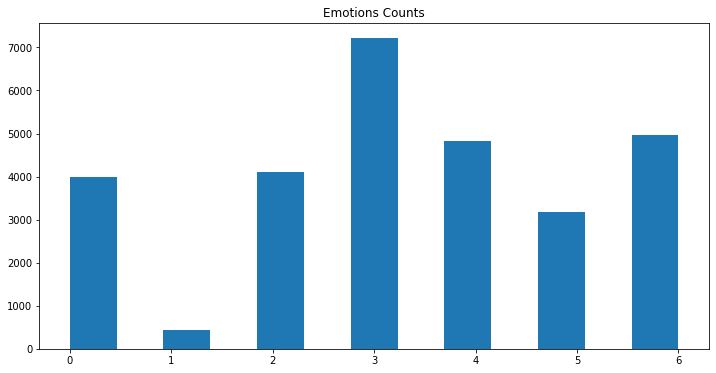

In [8]:
print(dataset.groupby("emotion").count())
plt.figure(figsize = (12,6))
plt.hist(dataset["emotion"],bins = 13)
plt.title("Emotions Counts")
plt.show()

In [9]:
faces = np.asarray(faces)
#faces = np.expand_dims(faces,-1)

def normalizer(x):
    x = x.astype("float32")
    x = x / 255.0
    return x

faces = normalizer(faces)
print(faces.shape)

(28709, 48, 48, 3)


In [10]:
print("Max : ",faces.max())
print("Min : ",faces.min())
print("Number of total image dataset :",str(len(faces)))

Max :  1.0
Min :  0.0
Number of total image dataset : 28709


In [11]:
labels = pd.get_dummies(dataset["emotion"]).values
labels[:2]

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import tensorflow as tf

In [13]:
X_train,X_test,y_train,y_test = train_test_split(faces,labels,test_size = 0.1, random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1, random_state = 41)

print('Number of images in the training set: ', len(X_train))
print('Number of images in the test set: ', len(X_test))
print('Number of images in the validation set: ', len(X_val))

Number of images in the training set:  23254
Number of images in the test set:  2871
Number of images in the validation set:  2584


In [14]:
np.save("mod_xtest_trans",X_test)
np.save("mod_ytest_trans",y_test)

In [15]:
num_classes = 7
width,height = 48,48
batch_size = 16
epochs = 30

vgg = tf.keras.applications.VGG16(input_shape = (width,height,3),weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [16]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [17]:
vgg.trainable = False
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(num_classes,activation = "softmax")

In [18]:
model = Sequential([
                    vgg,
                    global_average_layer,
                    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 7)                 3591      
                                                                 
Total params: 14,718,279
Trainable params: 3,591
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
file_model = "model_vgg_expressoes.h5"
file_model_json = "model_vgg_expressoes.json" 
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
model_json = model.to_json()
with open(file_model_json, "w") as json_file:
    json_file.write(model_json)

In [21]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/30
1454/1454 [==============================] - ETA: 0s - loss: 1.6658 - accuracy: 0.3384
Epoch 1: val_loss improved from inf to 1.58936, saving model to model_vgg_expressoes.h5
1454/1454 [==============================] - 43s 23ms/step - loss: 1.6658 - accuracy: 0.3384 - val_loss: 1.5894 - val_accuracy: 0.3758 - lr: 0.0010
Epoch 2/30
1453/1454 [============================>.] - ETA: 0s - loss: 1.5787 - accuracy: 0.3869
Epoch 2: val_loss improved from 1.58936 to 1.55448, saving model to model_vgg_expressoes.h5
1454/1454 [==============================] - 33s 23ms/step - loss: 1.5787 - accuracy: 0.3869 - val_loss: 1.5545 - val_accuracy: 0.3843 - lr: 0.0010
Epoch 3/30
1452/1454 [============================>.] - ETA: 0s - loss: 1.5483 - accuracy: 0.4053
Epoch 3: val_loss improved from 1.55448 to 1.54306, saving model to model_vgg_expressoes.h5
1454/1454 [==============================] - 35s 24ms/step - loss: 1.5482 - accuracy: 0.4054 - val_loss: 1.5431 - val_accuracy: 0.3982 - l

In [22]:
scores = model.evaluate(np.array(X_test),np.array(y_test),batch_size = batch_size)
print("Accuracy : ", scores[1] )
print("Loss : ", scores[0])

180/180 [==============================] - 4s 22ms/step - loss: 1.5429 - accuracy: 0.4072
Accuracy :  0.407175213098526
Loss :  1.5429468154907227


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


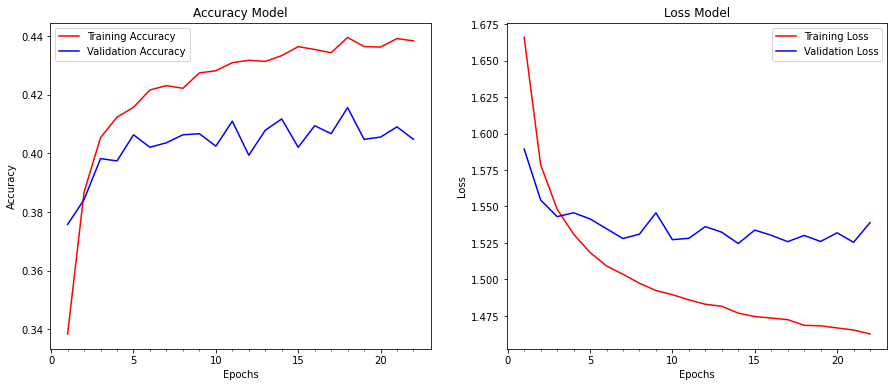

In [23]:
def history_graph(history):

    fig,ax = plt.subplots(1,2,figsize =(15,6))
    ax[0].plot(range(1,len(history.history["accuracy"]) + 1), history.history["accuracy"],"r")
    ax[0].plot(range(1,len(history.history["val_accuracy"]) + 1), history.history["val_accuracy"],"b")
    ax[0].set_title("Accuracy Model")
    ax[0].set_ylabel("Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_xticks(np.arange(1,len(history.history["accuracy"]) + 1),
                     len(history.history["accuracy"]) / 10)
    
    ax[0].legend(["Training Accuracy", "Validation Accuracy"])
    
    ax[1].plot(range(1,len(history.history["loss"]) + 1), history.history["loss"],"r")
    ax[1].plot(range(1,len(history.history["val_loss"]) + 1), history.history["val_loss"],"b")
    ax[1].set_title("Loss Model")
    ax[1].set_ylabel("Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_xticks(np.arange(1,len(history.history["loss"]) + 1),
                     len(history.history["loss"]) / 10)
    
    ax[1].legend(["Training Loss", "Validation Loss"])

history_graph(history)

In [24]:
y = np.load("/content/mod_ytest_trans.npy")
x = np.load("/content/mod_xtest_trans.npy")
model.predict(x[0].reshape(1,48,48,3))

array([[9.5517419e-02, 1.7679138e-05, 3.2886130e-01, 2.5638813e-01,
        2.7948281e-01, 1.7088000e-02, 2.2644572e-02]], dtype=float32)

In [25]:
true_y = []
pred_y = []
x = np.load("/content/mod_xtest_trans.npy")
y = np.load("/content/mod_ytest_trans.npy")

json_file = open(file_model_json,"r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(file_model)

y_pred = loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if (yp[i].index(yy) == yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100
np.save("truey_trans",true_y)
np.save("predy_trans",pred_y)
print("Accuracy Test : " + str(round(acc,2)) + "%")

Accuracy Test : 42.32%


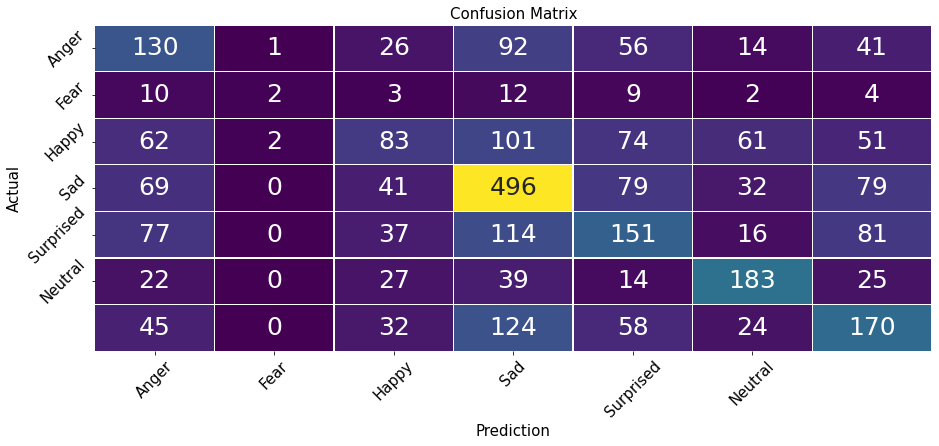

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = np.load("/content/truey_trans.npy")
y_pred = np.load("/content/predy_trans.npy")

expressions = ['Anger', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']

def confusion_matrix_graph(y_true,y_pred,label):
    cm = confusion_matrix(y_true,y_pred)
    size = 15

    plt.figure(figsize = (15,6))
    sns.heatmap(cm,annot=True,fmt = "d",cmap = "viridis", cbar = False, xticklabels=label,yticklabels = label,
                linecolor="white",linewidths=.2,annot_kws = {"size":25,})
    

    plt.title("Confusion Matrix",fontsize = size)
    plt.ylabel("Actual",fontsize = size)
    plt.xlabel("Prediction",fontsize = size)
    plt.yticks(rotation = 45,fontsize = size)
    plt.xticks(rotation = 45,fontsize = size)
    plt.show()

confusion_matrix_graph(y_true,y_pred,expressions)

# Testing

In [27]:
loaded_model = tf.keras.models.load_model("/content/model_vgg_expressoes.h5")

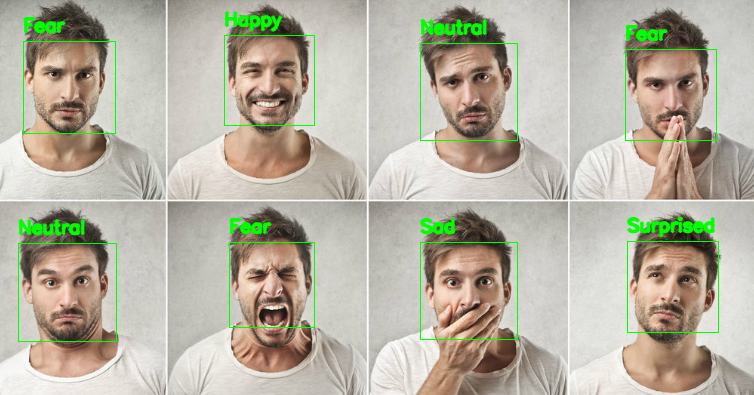

In [29]:
face_cascade = cv2.CascadeClassifier("/content/Material/haarcascade_frontalface_default.xml")
expressions = ['Anger','Disgust','Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']

img = cv2.imread("/content/Material/testes/teste02.jpg")
faces = face_cascade.detectMultiScale(img,1.1,3)

for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    roi = img[y:y+h,x:x+w]
    roi = roi.astype("float") / 255.0
    resize = cv2.resize(roi,(48,48))
    cropped_img = np.expand_dims(np.expand_dims(resize,-1), 0)
    prediction = loaded_model.predict(cropped_img)[0]

    label = expressions[int(np.argmax(prediction))]

    cv2.putText(img,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2,cv2.LINE_AA)

cv2_imshow(img)